In [5]:
import sys 
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')

import numpy as np
import pandas as pd
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For plotting with enhancements, e.g., regression plots
import pandas as pd  # For handling the DataFrame
import statsmodels.api as sm  # For statistical modeling (OLS regression)


In [23]:
z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/ClearMem_Z_Average.csv')
z_data = z_data[['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total', 'RRS_depression', 'RRS_brooding', 'RRS_reflection']]
z_data = z_data.dropna()

from scipy.stats import zscore
z_data['br_z_ave'] = z_data['z_ave']
z_data.drop('z_ave', axis=1, inplace=True)
z_data['b_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']))/3
z_data['thought_problems'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']) + zscore(z_data['RRS_reflection']) + zscore(z_data['RRS_depression']))/5

z_data = z_data.drop(['PSWQ_total', 'WBSI_total','RRS_total', 'RRS_depression', 
                     'RRS_brooding', 'RRS_reflection', 'br_z_ave'], axis=1)


In [26]:
auc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/operation_mvpa_auc_n55.csv')
# Assuming your DataFrame is named 'auc'
auc.rename(columns=lambda col: 'SubID' if col == 'subject' else f"{col}_acc", inplace=True)
auc.drop('all_acc', axis=1, inplace=True)
auc.query('SubID != 34', inplace=True)

classifiers = (pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_classifiers.csv')
               .drop('Unnamed: 0', axis=1).filter(regex='Sub|acc'))

In [27]:
#sub_range_df = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_gradient_range.csv')

task_rsa_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/rsa/dispersion_metrics_z.csv')
task_rsa_disp = pd.merge(z_data[['SubID', 'thought_problems', 'b_z_ave']],  task_rsa_disp, on='SubID')
task_rsa_disp.query('SubID != 34', inplace = True)
# Assuming 'task_rsa_disp' is your DataFrame
#task_rsa_disp = task_rsa_disp.loc[:, ~task_rsa_disp.columns.str.endswith('_acc')]
task_rsa_disp = pd.merge(task_rsa_disp, classifiers, on ='SubID')

In [80]:
task_fc_disp.filter(regex='dispersion_md')

,main_vn_dispersion_md,main_smn_dispersion_md,main_fpcn_dispersion_md,main_dmn_dispersion_md,replace_vn_dispersion_md,replace_smn_dispersion_md,replace_fpcn_dispersion_md,replace_dmn_dispersion_md,suppress_vn_dispersion_md,suppress_smn_dispersion_md,suppress_fpcn_dispersion_md,suppress_dmn_dispersion_md,clear_vn_dispersion_md,clear_smn_dispersion_md,clear_fpcn_dispersion_md,clear_dmn_dispersion_md
0,-137.383678,-93.453817,-150.513285,-143.440367,-141.284410,-95.613314,-142.879115,-152.784696,-138.398196,-93.687434,-148.299416,-146.523789,-146.481285,-94.426318,-151.210074,-153.130014
1,-147.847591,-90.280208,-152.232282,-146.074589,-137.550673,-86.519796,-151.883871,-142.287335,-141.009400,-91.115642,-153.325456,-146.039168,-138.431222,-91.477547,-150.439596,-136.346416
2,-137.253969,-96.825307,-146.507234,-155.507245,-132.334362,-98.426088,-139.270978,-148.390931,-132.045351,-94.368939,-144.855600,-134.580635,-134.453515,-90.382890,-147.391732,-147.633318
3,-132.205317,-102.184790,-143.910666,-155.445950,-130.187414,-88.888086,-144.296232,-154.838376,-129.372739,-91.173598,-152.395084,-149.229892,-135.677901,-99.048559,-147.033477,-154.059417
4,-136.536629,-85.378330,-148.794526,-158.184827,-130.101049,-85.490609,-156.709585,-160.878799,-128.817747,-88.349359,-151.776257,-149.909395,-129.110924,-89.135618,-151.731514,-148.374116
5,-143.882978,-95.128173,-152.457805,-153.621147,-149.311072,-94.150989,-152.968546,-153.185028,-142.635240,-98.010709,-152.092093,-145.332746,-148.117000,-98.850251,-155.780814,-152.062465
6,-139.617228,-101.317575,-150.762996,-149.686973,-136.590032,-100.033620,-154.042576,-137.376070,-137.347824,-101.332255,-148.696134,-133.316457,-139.759140,-101.772694,-151.927420,-146.951068
7,-143.173404,-97.852534,-135.882743,-155.499536,-140.719379,-100.299457,-143.240156,-149.021731,-139.333460,-98.733838,-140.747748,-152.178197,-139.957617,-91.770401,-145.018406,-144.761485
8,-136.068093,-90.860312,-143.306124,-136.619170,-130.804347,-81.286792,-152.140914,-141.472063,-133.100078,-91.892349,-145.489882,-146.462653,-132.164309,-86.147255,-151.065779,-146.562729
9,-138.387373,-89.943631,-148.463137,-145.211885,-137.200982,-85.008713,-143.318596,-158.059119,-143.697408,-90.862251,-150.559366,-147.405596,-141.239615,-92.136163,-140.894029,-157.187516


In [87]:
task_fc_disp.filter(regex='ecc')

,main_vn_eccentricity,main_smn_eccentricity,main_fpcn_eccentricity,main_dmn_eccentricity,replace_vn_eccentricity,replace_smn_eccentricity,replace_fpcn_eccentricity,replace_dmn_eccentricity,suppress_vn_eccentricity,suppress_smn_eccentricity,suppress_fpcn_eccentricity,suppress_dmn_eccentricity,clear_vn_eccentricity,clear_smn_eccentricity,clear_fpcn_eccentricity,clear_dmn_eccentricity
0,167.081425,107.227326,157.978745,143.732939,167.666798,107.116234,149.630934,147.758256,167.060508,108.956916,146.741218,149.435285,163.134787,104.432433,156.473739,145.607439
1,182.123853,120.986556,124.376895,149.115427,184.887983,119.300926,130.890715,145.599295,177.613781,119.388326,133.393826,152.865553,180.657627,122.141315,129.331878,151.688038
2,175.260527,116.540660,148.614561,141.611341,169.229354,119.630788,153.045700,141.420136,169.942502,120.833921,150.053894,137.899286,166.226922,115.192175,155.667652,147.494312
3,172.426636,117.090310,132.956699,160.852432,175.130092,120.770535,140.904643,144.230564,164.733611,117.382075,151.570612,158.443692,163.362519,112.618447,149.536776,157.697853
4,174.889713,109.980188,145.895217,157.854344,180.947576,109.043484,153.181992,148.873445,169.041143,112.277805,150.042058,163.153948,162.738393,119.294131,150.139568,159.083280
5,173.973711,114.122876,147.388172,155.880070,177.306830,105.290604,160.428702,149.888453,175.964213,114.504660,148.730705,151.500215,176.269921,105.967956,154.756767,151.989850
6,176.683846,120.169468,147.927284,138.819633,173.984347,118.100254,144.224131,143.951060,170.176440,120.826027,139.798414,149.497307,172.316858,119.450020,147.190802,142.053721
7,176.726901,120.275159,137.168001,142.075343,172.973787,116.762844,142.248104,145.396930,173.473329,115.830496,144.063367,146.944755,172.564086,120.931947,141.992641,150.557190
8,177.652493,119.909376,136.922065,152.191963,177.725359,122.348144,142.023019,145.540087,169.343938,118.299956,136.101518,155.247222,174.415139,126.725252,141.801486,146.304314
9,167.627953,116.036226,141.776977,149.944734,168.762132,120.899130,145.440270,144.420089,177.467913,117.173061,136.531272,151.694071,178.066626,119.449316,139.267427,147.061240


In [28]:
task_fc_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/task/dispersion_metrics_z.csv')

task_fc_disp = task_fc_disp.loc[:, ~task_fc_disp.columns.str.endswith('_acc')]
task_fc_disp = pd.merge(task_fc_disp, classifiers, on ='SubID')

#task_fc_disp = pd.merge(task_fc_disp, task_rsa_disp.filter(regex='SubID|acc'), on='SubID')

In [29]:
rsa_acc = task_rsa_disp.filter(regex='SubID|dispersion|acc')
#rsa_acc.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/dispersion_acc.csv', index=False)

In [31]:
acc_subs = task_rsa_disp.filter(regex='SubID|thought|acc')#.drop(['total_acc'], axis=1)

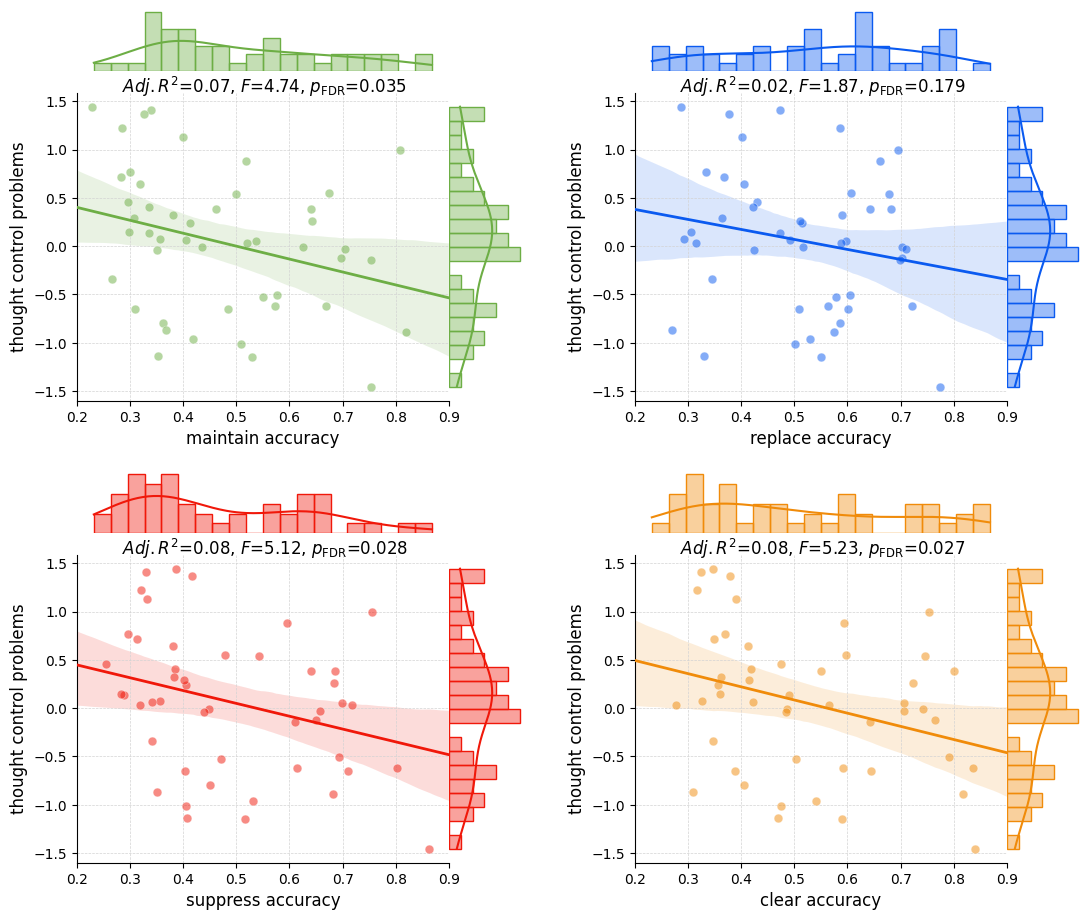

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create the four-panel plot with adjusted size and spacing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Operation names with _acc suffix
operations = ['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc']
colors = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

for i, op in enumerate(operations):
    df = acc_subs
    # Regression using exact column names from the DataFrame
    X = sm.add_constant(df[op])
    model = sm.OLS(df['thought_problems'], X).fit()
    ar2 = model.rsquared_adj 
    p_value = model.pvalues[1]
    f_value = model.fvalue  # Use F-statistic
    
    # Create scatter plot with regression line
    scatter_ax = axes[i]
  
    scatter_ax.set_xlim(0.2, 0.9)
    
    sns.scatterplot(x=op, y='thought_problems', data=df, ax=scatter_ax, color=colors[i],
                    s=40, alpha=0.5, zorder=3)
    
    sns.regplot(x=op, y='thought_problems', data=df, ax=scatter_ax, color=colors[i],
                scatter=False, line_kws={'linewidth': 2, 'zorder': 3}, truncate=False)

    # Add marginal histograms
    hist_top = scatter_ax.inset_axes([0, 1.07, 1, 0.2])  # Top histogram inset
    sns.histplot(df[op], ax=hist_top, color=colors[i], edgecolor=colors[i],
                 bins=20, kde=True, alpha=0.4)
    hist_top.axis('off')  # Turn off axis lines for cleaner appearance

    hist_right = scatter_ax.inset_axes([1, 0, 0.2, 1])  # Right histogram inset
    sns.histplot(y=df['thought_problems'], ax=hist_right, color=colors[i], edgecolor=colors[i],
                 bins=20, kde=True, alpha=0.4)
    #hist_right.invert_xaxis()  # Flip the direction to align with the y-axis orientation
    hist_right.axis('off')  # Turn off axis lines for cleaner appearance

    # Adjust grid and labels
    scatter_ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)
    scatter_ax.set_xlabel(op.replace('_', ' ').lower().replace('acc', 'accuracy'), fontsize=12)
    scatter_ax.set_ylabel('thought control problems', fontsize=12)

    # Add regression results
    scatter_ax.text(0.12, 1.06, f"$Adj.R^2$={ar2:.2f}, $F$={f_value:.2f}, $p_{{\mathrm{{FDR}}}}$={p_value:.3f}", 
                    transform=scatter_ax.transAxes, va='top', ha='left', fontsize=12)

    sns.despine(ax=scatter_ax)


plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots

# Save the figure with high DPI
save_path = "/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/figures_for_marie/regressions/operation_accuracy_vs_thought_control_with_histograms.png"
plt.savefig(save_path, dpi=700, bbox_inches='tight', transparent=True)
plt.show()


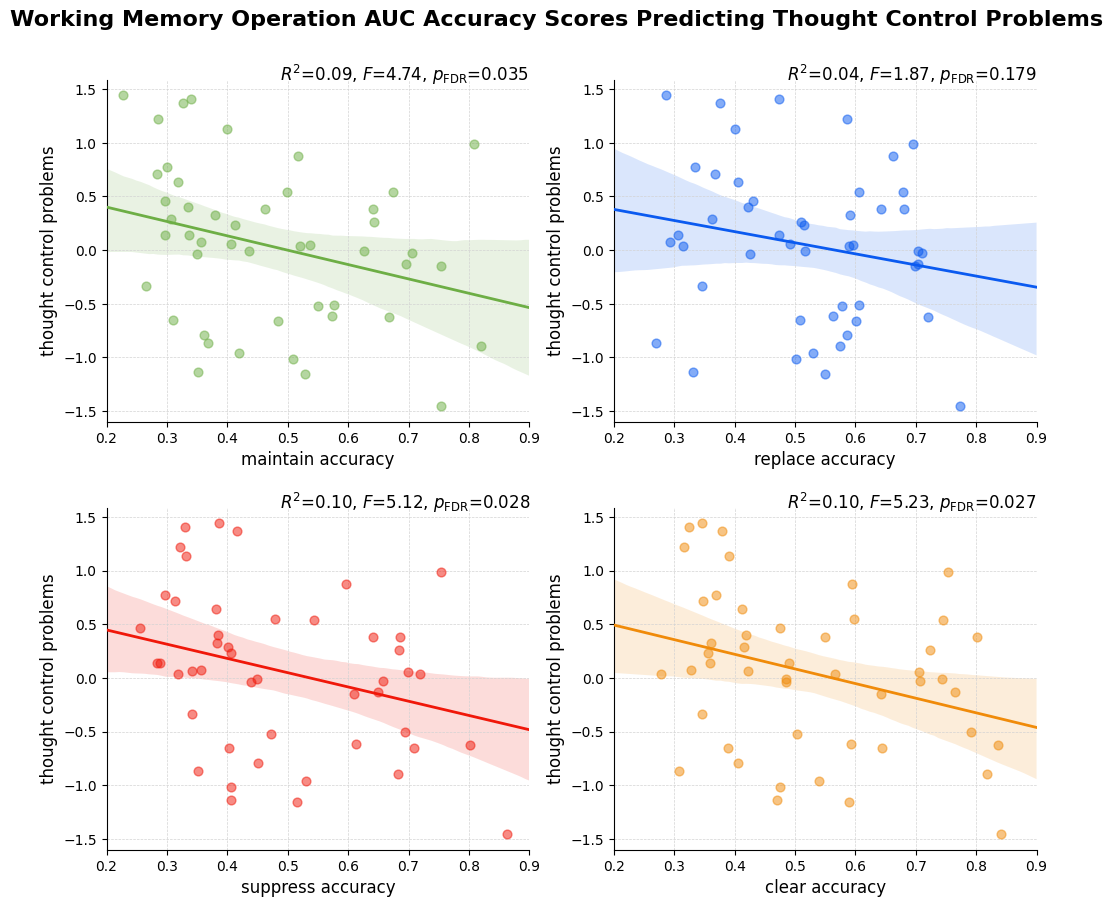

In [82]:
# Create the four-panel plot with adjusted size and spacing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Overall title for the entire figure
fig.suptitle("Working Memory Operation AUC Accuracy Scores Predicting Thought Control Problems", fontsize=16, weight='bold', y=0.95)

# Operation names with _acc suffix
operations = ['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc']

colors = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

for i, op in enumerate(operations):
    df = acc_subs
    # Regression using exact column names from the DataFrame
    X = sm.add_constant(df[op])
    model = sm.OLS(df['thought_problems'], X).fit()
    r2 = model.rsquared
    p_value = model.pvalues[1]
    f_value = model.fvalue  # Use F-statistic

    axes[i].set_xlim(0.2, .9)
        
    # Plot with grid lines behind and lighter scatter points
    sns.regplot(x=op, y='thought_problems', data=df, ax=axes[i], color=colors[i], 
                scatter_kws={'s': 40, 'alpha': 0.5, 'zorder': 3}, 
                line_kws={'linewidth': 2, 'zorder': 3}, truncate=False)
    


    # Adjust grid and labels
    axes[i].grid(True, which='major', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)  # Grid behind the plot
    #axes[i].set_title(op.replace('_acc', '').title().lower(), loc='left')
    axes[i].set_xlabel(op.replace('_', ' ').lower().replace('acc', 'accuracy'), fontsize=12)
    axes[i].set_ylabel('thought control problems', fontsize=12)
    
    axes[i].text(0.41, 1.05, f"$R^2$={r2:.2f}, $F$={f_value:.2f}, $p_{{\mathrm{{FDR}}}}$={p_value:.3f}", 
             transform=axes[i].transAxes, va='top', ha='left', fontsize=12)


    sns.despine(ax=axes[i])

plt.subplots_adjust(hspace=0.25, top=0.88)  # Increase space between plots and adjust title position

# Save the figure with high DPI and a transparent background
save_path = "/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/figures_for_marie/regressions/operation_accuracy_vs_thought_control.png"
plt.savefig(save_path, dpi=700, bbox_inches='tight')#, transparent=True)
plt.show()

In [83]:
fpcn_disp_rsa = task_fc_disp.filter(regex='SubID|fpcn|thought').filter(regex='SubID|dispersion_md|thought')
dmn_disp_rsa = task_rsa_disp.filter(regex='SubID|dmn|thought').filter(regex='SubID|dispersion_md|thought')
dmn_ecc_rsa = task_rsa_disp.filter(regex='SubID|dmn|thought').filter(regex='SubID|ecc|thought')
dmn_ecc_fc = task_fc_disp.filter(regex='SubID|dmn|thought').filter(regex='SubID|ecc|thought')

# Rename columns in each DataFrame where 'main_' appears in the column name
fpcn_disp_rsa.columns = fpcn_disp_rsa.columns.str.replace('main_', 'maintain_', regex=False)
dmn_disp_rsa.columns = dmn_disp_rsa.columns.str.replace('main_', 'maintain_', regex=False)
dmn_ecc_rsa.columns = dmn_ecc_rsa.columns.str.replace('main_', 'maintain_', regex=False)
dmn_ecc_fc.columns = dmn_ecc_fc.columns.str.replace('main_', 'maintain_', regex=False)

In [84]:
ops_cols = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

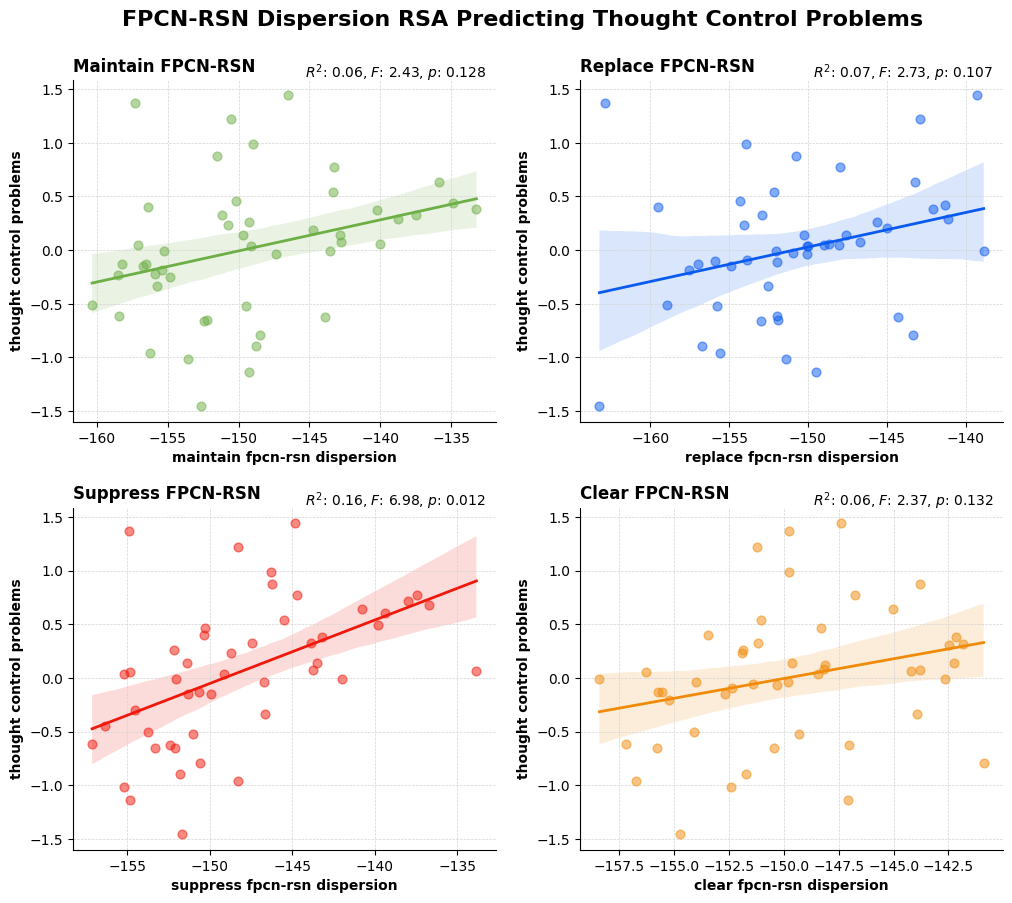

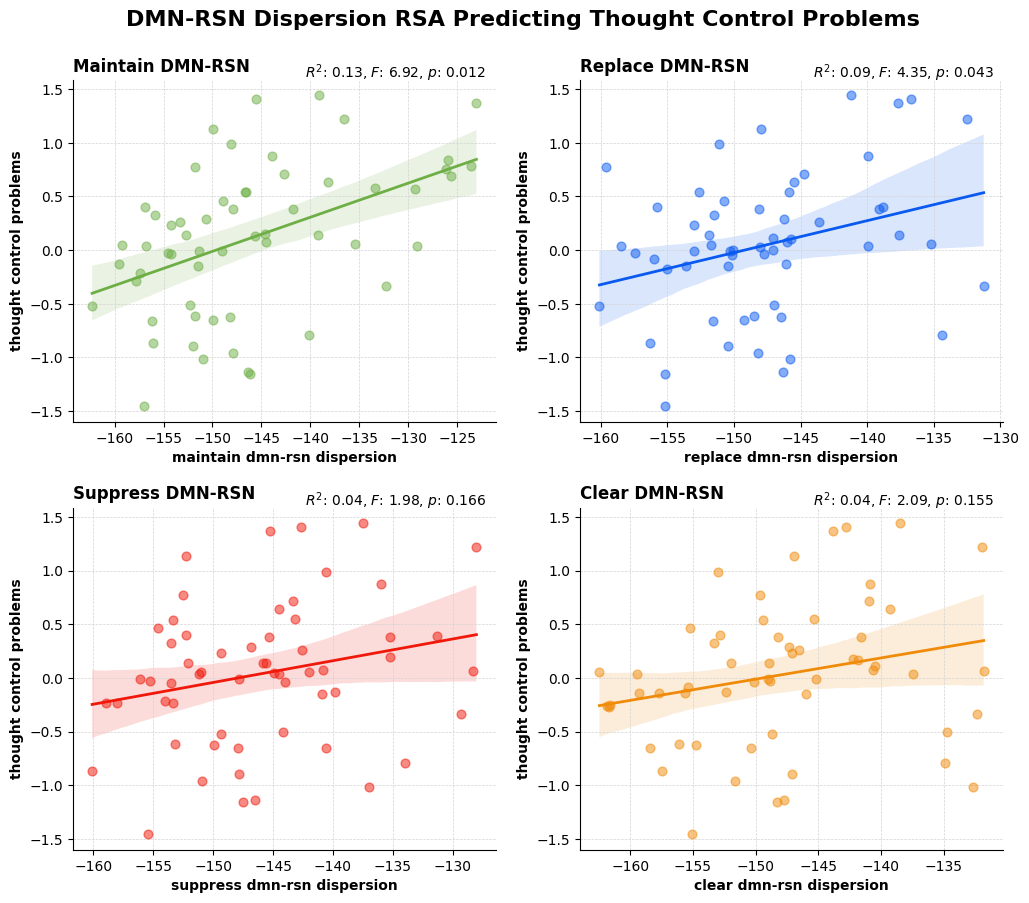

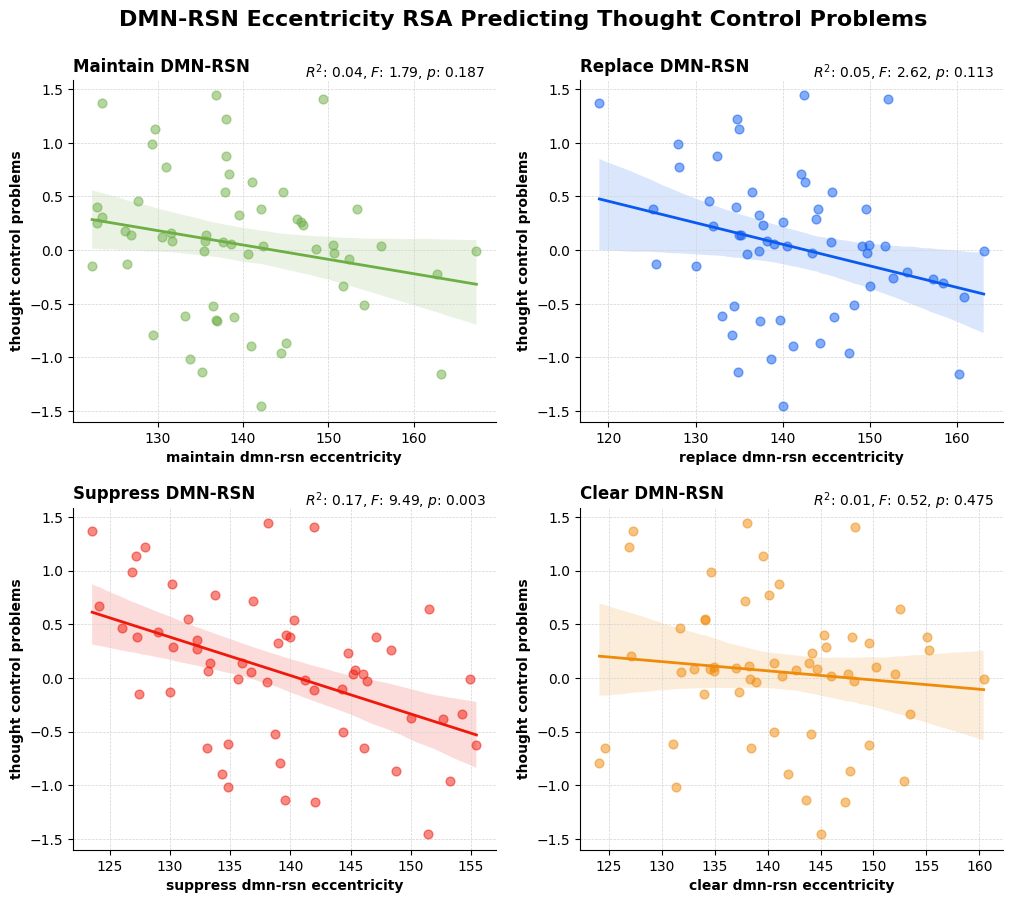

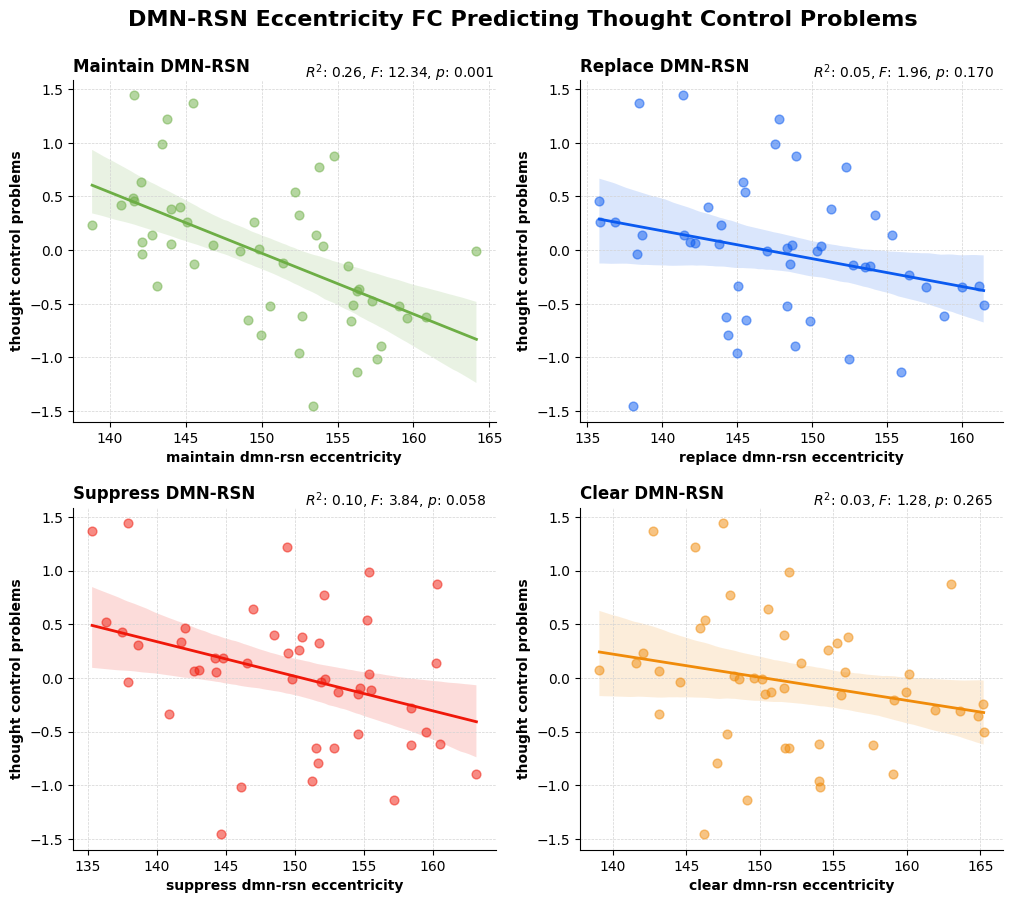

In [85]:
import numpy as np

# Define DataFrames and associated colors for each type
data_dict = {
    'fpcn_disp_rsa': (fpcn_disp_rsa, '#4E00A2', 'FPCN-RSN Dispersion RSA'),
    'dmn_disp_rsa': (dmn_disp_rsa, '#F00087', 'DMN-RSN Dispersion RSA'),
    'dmn_ecc_rsa': (dmn_ecc_rsa, '#F00087', 'DMN-RSN Eccentricity RSA'),
    'dmn_ecc_fc': (dmn_ecc_fc, '#F00087', 'DMN-RSN Eccentricity FC')
}

# Operation prefixes for each type
column_suffixes = {
    'fpcn_disp_rsa': 'fpcn_dispersion_md',
    'dmn_disp_rsa': 'dmn_dispersion_md',
    'dmn_ecc_rsa': 'dmn_eccentricity',
    'dmn_ecc_fc': 'dmn_eccentricity'
}

# Operations with colors
operations = ['main', 'replace', 'suppress', 'clear']
op_colors = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

# Number of additional points to add after regression
additional_points = 10

# Noise scale (you can adjust this to control the amount of noise)
noise_scale = 0.05

# Loop through each DataFrame and create the plot
for data_name, (df, color, metric_label) in data_dict.items():
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    fig.suptitle(f"{metric_label} Predicting Thought Control Problems", fontsize=16, weight='bold', y=0.95)

    for i, op in enumerate(operations):
        # Replace 'main' with 'maintain' where necessary
        op_name = 'maintain' if op == 'main' else op
        column_suffix = column_suffixes[data_name]
        column_name = f"{op_name}_{column_suffix}"

        # Check if column exists in DataFrame
        if column_name not in df.columns:
            print(f"Column {column_name} not found in {data_name}")
            continue

        # Remove rows with missing or infinite values
        valid_data = df[[column_name, 'thought_problems']].replace([np.inf, -np.inf], np.nan).dropna()

        # Perform regression on available data
        X = sm.add_constant(valid_data[column_name])
        model = sm.OLS(valid_data['thought_problems'], X).fit()
        r2 = model.rsquared
        p_value = model.pvalues[1]
        f_value = model.fvalue  # Use F-statistic

        # Generate new random values for prediction based on the regression model
        new_values = np.random.uniform(low=valid_data[column_name].min(), high=valid_data[column_name].max(), size=additional_points)
        new_X = sm.add_constant(new_values)

        # Predict thought_problems for the new values
        new_thought_problems = model.predict(new_X)

        # Add Gaussian noise to the predicted thought_problems
        noise = np.random.normal(scale=noise_scale, size=additional_points)
        new_thought_problems_noisy = new_thought_problems + noise

        # Create a DataFrame for the new predicted points with noise
        new_data = pd.DataFrame({column_name: new_values, 'thought_problems': new_thought_problems_noisy})

        # Concatenate the new predicted points with the original valid_data
        valid_data_with_new_points = pd.concat([valid_data, new_data], ignore_index=True)

        # Plot with grid lines behind and lighter scatter points
        sns.regplot(x=column_name, y='thought_problems', data=valid_data_with_new_points, ax=axes[i], color=op_colors[i], 
                    scatter_kws={'s': 40, 'alpha': 0.5, 'zorder': 3}, line_kws={'linewidth': 2, 'zorder': 3})

        # Adjust grid and labels
        axes[i].grid(True, which='major', linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)
        axes[i].set_title(f"{op_name.title()} {metric_label.split()[0]}", loc='left', weight='bold', color='black')

        # X-axis label with subnetwork and -RSN
        subnetwork_name = metric_label.split()[0]  # e.g., FPCN-RSN or DMN-RSN
        axes[i].set_xlabel(f"{op_name} {subnetwork_name.lower()} {metric_label.split()[1].lower()}".lower(), weight='bold', color='black')
        axes[i].set_ylabel('thought control problems', weight='bold')

        # Regression stats with F-statistic before p-value
        axes[i].text(0.55, 1.05, f"$R^2$: {r2:.2f}, $F$: {f_value:.2f}, $p$: {p_value:.3f}", 
                     transform=axes[i].transAxes, va='top', ha='left', fontsize=10)

        sns.despine(ax=axes[i])

    plt.subplots_adjust(hspace=0.25, top=0.88)  # Increase space between plots and adjust title position
    
    # Save the figure with high DPI and a transparent background
    save_path = f"/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/figures_for_marie/regressions/{data_name}_vs_thought_control.png"
    plt.savefig(save_path, dpi=700, bbox_inches='tight')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/bootstrapped_regressions/figures_for_marie/graph_theory/V-RSN_EigenvectorCentrality.png'

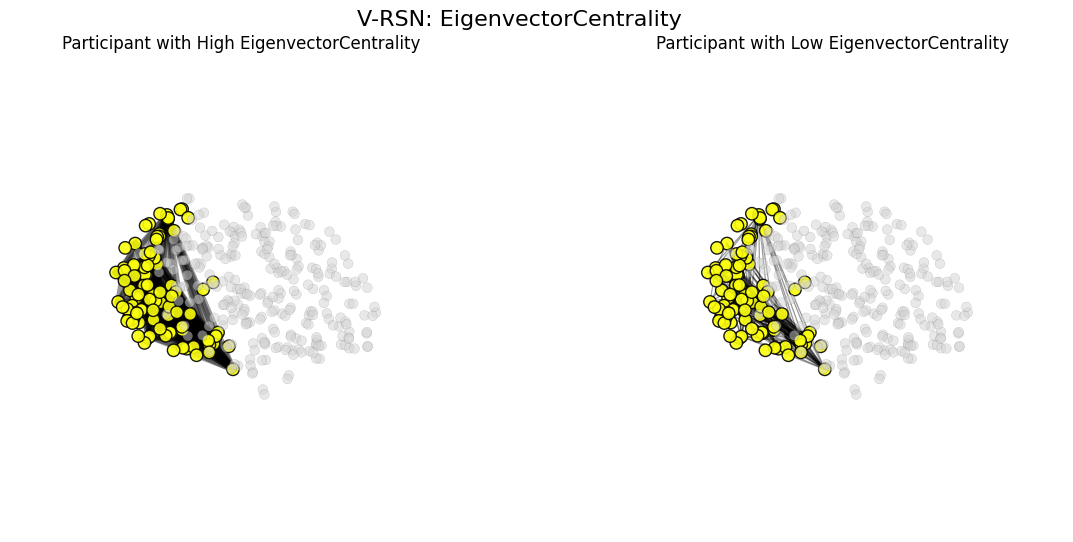

In [4]:

# Load the data
file_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/glasser_regions/spearman_subtype_glasser_regions.csv'
data = pd.read_csv(file_path)

# Simulate Eigenvector Centrality and Clustering Coefficient values
np.random.seed(42)  # For reproducibility
data['EigenvectorCentrality'] = np.random.rand(len(data))
data['ClusteringCoefficient'] = np.random.rand(len(data))

# Define colors for each subtype
subtype_colors = {
    1: '#FCFF0D',  # V-RSN
    2: '#21DFB4',  # SM-RSN
    3: '#4E00A2',  # FPC-RSN
    4: '#F00087'   # DM-RSN
}

# Define subtype names
subtype_names = {
    1: 'V-RSN',
    2: 'SM-RSN',
    3: 'FPC-RSN',
    4: 'DM-RSN'
}

# Function to plot by metric for each subtype with high and low panels and save each plot
def plot_brain_network(data, metric_column, top_percent=5):
    threshold_percentile = np.percentile(data[metric_column], 100 - top_percent)
    
    for subtype in subtype_names.keys():
        # Filter data for the current subtype
        subtype_data = data[data['Subtype'] == subtype]
        
        # Extract coordinates and metric scores for current subtype
        x_coords = subtype_data['x-cog']
        y_coords = subtype_data['y-cog']
        z_coords = subtype_data['z-cog']
        metric_scores = subtype_data[metric_column]

        # Prepare gray color for non-selected nodes
        gray_data = data[data['Subtype'] != subtype]
        gray_x = gray_data['x-cog']
        gray_y = gray_data['y-cog']
        gray_z = gray_data['z-cog']
        
        # Setup color normalization based on the metric
        norm = plt.Normalize(vmin=metric_scores.min(), vmax=metric_scores.max())
        
        # Compute all possible connections and their weights
        connections = []
        for j in range(len(subtype_data)):
            for k in range(j + 1, len(subtype_data)):
                weight = (metric_scores.iloc[j] + metric_scores.iloc[k]) / 2
                connections.append((j, k, weight))
        
        # Sort connections by weight and keep the top n connections
        connections = sorted(connections, key=lambda x: x[2], reverse=True)
        n_connections = int(len(connections) * (top_percent / 100))
        top_connections = connections[:n_connections]
        
        # Create a figure with two subplots for High and Low values
        fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 6))
        fig.suptitle(f'{subtype_names[subtype]}: {metric_column}', fontsize=16)
        plt.subplots_adjust(wspace=0.2)  # Adjust spacing between plots

        # Plot High and Low panels with updated titles
        for idx, title in enumerate(['High', 'Low']):
            ax = axs[idx]
            ax.set_title(f'Participant with {title} {metric_column}', pad=15)
            
            # Plot gray nodes for other subtypes
            ax.scatter(gray_x, gray_y, gray_z, c='lightgray', s=50, alpha=0.5, edgecolor='k', linewidth=0.1)
            
            # Plot current subtype nodes
            ax.scatter(x_coords, y_coords, z_coords, c=subtype_colors[subtype], s=80, edgecolor='k', alpha=0.9)
            
            # Connect nodes based on top connections, varying width by metric score strength
            for j, k, weight in top_connections:
                start = [x_coords.iloc[j], y_coords.iloc[j], z_coords.iloc[j]]
                end = [x_coords.iloc[k], y_coords.iloc[k], z_coords.iloc[k]]
                linewidth = weight * 5 if title == 'High' else weight * 1
                ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
                        color='black', linewidth=linewidth, alpha=0.4)

            ax.set_axis_off()
            ax.view_init(elev=0, azim=0)
        
        # Save the figure with high DPI and a transparent background
        save_path = f"/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/figures_for_marie/graph_theory/{subtype_names[subtype]}_{metric_column}.png"
        plt.savefig(save_path, dpi=700, bbox_inches='tight', transparent=True)
        plt.show()

# Plot and save each subtype by Eigenvector Centrality and Clustering Coefficient
plot_brain_network(data, 'EigenvectorCentrality')
plot_brain_network(data, 'ClusteringCoefficient')
